## Skin Lesions Dataset Description

The dataset comprises various types of skin lesions, each falling under specific categories:

- **Actinic Keratoses and Intraepithelial Carcinoma / Bowen's Disease (AKIEC)**
- **Basal Cell Carcinoma (BCC)**
- **Benign Keratosis-like Lesions**:
  - *Solar Lentigines*
  - *Seborrheic Keratoses*
  - *Lichen-Planus like Keratoses (BKL)*
- **Dermatofibroma (DF)**
- **Melanoma (MEL)**
- **Melanocytic Nevi (NV)**
- **Vascular Lesions**:
  - *Angiomas*
  - *Angiokeratomas*
  - *Pyogenic Granulomas*
  - *Hemorrhage (VASC)*

**Diagnosis Confirmation:**

- Over 50% of lesions in this dataset are confirmed through **histopathology (Histo)**, serving as the ground truth for these cases.
- For the remaining cases, confirmation methods include:
  - *Follow-up examination (Follow_Up)*
  - *Expert Consensus (Consensus)*
  - *Confirmation by In-Vivo Confocal Microscopy (Confocal)*

Each lesion might have multiple associated images, allowing for tracking via the `lesion_id` column within the `HAM10000_metadata` file.

This diverse dataset contains various types of skin lesions, each categorized and confirmed through different diagnostic approaches, contributing to a comprehensive resource for research and analysis.


In [1]:
# labels_dict = {
#     'akiec': "Actinic Keratoses and Intraepithelial Carcinoma / Bowen's Disease (AKIEC)",
#     'bcc': "Basal Cell Carcinoma (BCC)",
#     'bkl': "Benign Keratosis-like Lesions",
#     'df': "Dermatofibroma (DF)",
#     'mel': "Melanoma (MEL)",
#     'nv': "Melanocytic Nevi (NV)",
#     'vasc': "Vascular Lesions",
#     'histo': "Confirmed through Histopathology (Histo)",
#     'follow_up': "Follow-up examination (Follow_Up)",
#     'consensus': "Expert Consensus (Consensus)",
#     'confocal': "Confirmation by In-Vivo Confocal Microscopy (Confocal)"
# }


In [2]:
# labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Imports

In [3]:
import os  
import glob
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


import PIL 
import random
import numpy as np
import matplotlib.pyplot as plt 

from tool_preprocessing import *

# Preprocessing

In this notebook, labels are initially considered as categorical.

## Manual Part

If the images are organized in the folders of each label, the following flag must be True

In [4]:
flag_folder_sep = True

In [5]:
if flag_folder_sep:
    base_path = 'C:/Users/lucas/OneDrive - unb.br/Documents/UnB/Semestres-ENE/TCC/COVID_Dataset_original'
else:
    base_path = 'C:/Users/lucas/OneDrive - unb.br/Documents/UnB/Semestres-ENE/TCC/The HAM10000 dataset'

In [6]:
if flag_folder_sep :
    label_column = 'label'
    train_df, test_df, val_df  = make_dataset_by_folder(base_path=base_path, label_column=label_column)

else:
    
    path_train_df = f'{base_path}/HAM10000_metadata'
    path_test_df = f'{base_path}/test.csv'
    
    path_train = f"{base_path}/treino"
    path_test = f"{base_path}/test"
    
    paths_image = [path_train, path_test]
    paths_df = [path_train_df, path_test_df]
    label_column = 'dx'
    
    train_df, test_df, val_df = make_dataset_by_df(paths_image, paths_df, label_column=label_column)
    
    

Normal - 2039
Lung_Opacity - 1203
COVID - 724
Viral_Pneumonia - 269
Is equal
Is equal
Is equal
Is equal
Is equal
Is equal
Label 'COVID' is not equal. Expected - 361, Actual - 362
Is equal
Label 'Normal' is not equal. Expected - 1019, Actual - 1020
Label 'Lung_Opacity' is not equal. Expected - 601, Actual - 602
Label 'COVID' is not equal. Expected - 361, Actual - 362
Label 'Viral_Pneumonia' is not equal. Expected - 134, Actual - 135


## Analysis

### Train

In [7]:
image_analysis_train = image_analysis(train_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 16930


In [8]:
train_df = check_images_existence(train_df, path_column='path')

In [9]:
dict_train_qntd = get_label_counts_and_print(train_df, label_column=label_column)
shapes_train = analyze_image_shapes(train_df, min_shape=(800, 800), path_column='path')

Total number of images: 16930
Number of unique labels: 4
Label 'Normal' has 8153 images.
Label 'Lung_Opacity' has 4809 images.
Label 'COVID' has 2892 images.
Label 'Viral_Pneumonia' has 1076 images.
Average image shape - Height: 299.0, Width: 299.0
Number of images with shape smaller than (800, 800): 16930


In [10]:
dict_train_qntd

{'Normal': 8153, 'Lung_Opacity': 4809, 'COVID': 2892, 'Viral_Pneumonia': 1076}

### Test

In [11]:
image_analysis_test = image_analysis(test_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 2116


In [12]:
test_df = check_images_existence(test_df, path_column='path')

In [13]:
dict_test_qntd = get_label_counts_and_print(test_df, label_column=label_column)
shapes_test = analyze_image_shapes(test_df, min_shape=(300, 300), path_column='path')

Total number of images: 2116
Number of unique labels: 4
Label 'Normal' has 1019 images.
Label 'Lung_Opacity' has 601 images.
Label 'COVID' has 362 images.
Label 'Viral_Pneumonia' has 134 images.
Average image shape - Height: 299.0, Width: 299.0
Number of images with shape smaller than (300, 300): 2116


### Validation

In [14]:
image_analysis_val = image_analysis(val_df)

Smallest pixel value: 0
Largest pixel value: 255
Total images processed: 2119


In [15]:
val_df = check_images_existence(val_df, path_column='path')

In [16]:
dict_val_qntd = get_label_counts_and_print(val_df, label_column=label_column)
shapes_val = analyze_image_shapes(val_df, min_shape=(461, 601), path_column='path')

Total number of images: 2119
Number of unique labels: 4
Label 'Normal' has 1020 images.
Label 'Lung_Opacity' has 602 images.
Label 'COVID' has 362 images.
Label 'Viral_Pneumonia' has 135 images.
Average image shape - Height: 299.0, Width: 299.0
Number of images with shape smaller than (461, 601): 2119


## Model Preparation

In [17]:
from model_preprocessing import *

Passar de categorial para binário 

Pesos para a loss

### Categorial to number

In [18]:
labels_dict = labels2dict(train_df, label_column)
labels_dict

{'Normal': 0, 'Lung_Opacity': 1, 'COVID': 2, 'Viral_Pneumonia': 3}

In [19]:
train_label, test_label, val_label = dflabel2number([train_df, test_df, val_df], labels_dict, label_column)

### Weights

In [20]:
if len(labels_dict) == 1:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    weights = max(weights)
else:
    weights = calculate_weights(train_df, labels_dict, dict_train_qntd)
    print(weights)

[0.5191340610818104, 0.880120607194843, 1.4635200553250345, 3.933550185873606]


# Model

In [21]:
from models import *
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms

c:\Users\Lucas\anaconda3\envs\torch000\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset Class

In [22]:
class CT_Dataset(Dataset):
    def __init__(self, img_path, img_labels, channels, img_transforms=None):
        self.img_path = img_path
        self.img_labels = torch.Tensor(img_labels)
        if channels == 1:
            self.transforms = transforms.Compose([transforms.Grayscale(),
                                                #   transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        elif channels == 3:
            self.transforms = transforms.Compose([#transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        else:
            self.transforms = img_transforms
    
    def __getitem__(self, index):
        # load image
        cur_path = self.img_path[index]
        cur_img = PIL.Image.open(cur_path).convert('RGB')
        cur_img = self.transforms(cur_img)

        return cur_img, self.img_labels[index]
    
    def __len__(self):
        return len(self.img_path)

## GPU

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cuda')

In [24]:
print("Current GPU memory usage:", torch.cuda.memory_allocated() / (1024 ** 2), "MB")
print("Max GPU memory usage:", torch.cuda.max_memory_allocated() / (1024 ** 2), "MB")

torch.cuda.empty_cache()

Current GPU memory usage: 0.0 MB
Max GPU memory usage: 0.0 MB


## Random Seed

In [25]:
random_seed = 124
np.random.seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

## Training

In [26]:
try:
    mean_R = image_analysis_val['channel_statistics']['R']['average']
    mean_G = image_analysis_val['channel_statistics']['G']['average']
    mean_B = image_analysis_val['channel_statistics']['B']['average']
    channels = 1 if mean_R == mean_G == mean_B else 3
    
except KeyError:
    channels = image_analysis_val['channels']

In [27]:
train_dataset = CT_Dataset(img_path=np.array(train_df['path']), img_labels=np.array(train_label), channels=channels)
val_dataset = CT_Dataset(img_path=np.array(val_df['path']), img_labels=np.array(val_label), channels=channels)
test_dataset = CT_Dataset(img_path=np.array(test_df['path']), img_labels=np.array(test_label), channels=channels)

In [28]:
from trainer import *

In [29]:
batch_size = 16
Epochs = 20



# model_kernel = VGG16(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = ResNet50(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = ResNet101(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB0(num_classes=len(labels_dict), input_channels=channels)
# model_kernel = EfficientNetB4(num_classes=len(labels_dict), input_channels=channels)
model_kernel = EfficientNetB7(num_classes=len(labels_dict), input_channels=channels)



trainer = ModelTrainer(model_kernel, device, weights, labels_dict, train_dataset, val_dataset, test_dataset, batch_size= batch_size, epochs=Epochs)

Loaded pretrained weights for efficientnet-b7


In [30]:
trainer.loader()
trainer.loss_function()
trainer.optimizer_step()
print("Training Start:")
for epoch in range(Epochs):
    trainer.model.train()

    trainer.train_loss = 0
    trainer.train_acc = 0

    trainer.train()
    trainer.validate()
    history = trainer.loss_acc()


    print(f"Epoch:{epoch + 1} / {Epochs}, lr: {trainer.optimizer.param_groups[0]['lr']:.5f} train loss:{trainer.train_loss:.5f}, train acc: {trainer.train_acc:.5f}, valid loss:{trainer.val_loss:.5f}, valid acc:{trainer.val_acc:.5f}")
        
    # Update the best model if validation loss is the lowest so far
    if trainer.val_loss < trainer.best_val_loss:
        trainer.best_val_loss = trainer.val_loss
        trainer.best_model_state = trainer.model.state_dict()

    print(f'The best val loss is {trainer.best_val_loss}.\n')
    
    # Load the best model state
    if trainer.best_model_state is not None:
        trainer.model.load_state_dict(trainer.best_model_state)
    model = trainer.model
    
trainer.test()
metrics_df = trainer.metrics()

Training Start:
Epoch:1 / 20, lr: 0.00010 train loss:0.29425, train acc: 0.88102, valid loss:0.17635, valid acc:0.93045
The best val loss is 0.1763525754213333.

Epoch:2 / 20, lr: 0.00010 train loss:0.11916, train acc: 0.94842, valid loss:0.13671, valid acc:0.94408
The best val loss is 0.13670682907104492.

Epoch:3 / 20, lr: 0.00010 train loss:0.07715, train acc: 0.96518, valid loss:0.13268, valid acc:0.94784
The best val loss is 0.13268128037452698.

Epoch:4 / 20, lr: 0.00010 train loss:0.04946, train acc: 0.97710, valid loss:0.17610, valid acc:0.94643
The best val loss is 0.13268128037452698.

Epoch:5 / 20, lr: 0.00010 train loss:0.04331, train acc: 0.98005, valid loss:0.19738, valid acc:0.94925
The best val loss is 0.13268128037452698.

Epoch:6 / 20, lr: 0.00010 train loss:0.03001, train acc: 0.98678, valid loss:0.17471, valid acc:0.94502
The best val loss is 0.13268128037452698.

Epoch:7 / 20, lr: 0.00005 train loss:0.02570, train acc: 0.99014, valid loss:0.31538, valid acc:0.88205

In [31]:
metrics_df = trainer.metrics()
metrics_df = metrics_df.applymap(lambda x: str(x).replace('.', ','))

# Metrics

In [32]:
from model_metrics import *                                                                         

In [33]:
metrics_df

,Class,Precision,Recall,F1-Score,Accuracy,Best Val Loss,True Negatives,specificity,sensitivity,False Positives,False Negatives,True Positives
0,Normal,"0,9444444444444444","0,9842983316977428","0,9639596347909659","0,9621928166351607","0,13268128037452698",1038,"0,9462169553327257","0,9842983316977428",59,16,1003
1,Lung_Opacity,"0,9748201438848921","0,9018302828618968","0,9369057908383752","0,9621928166351607","0,13268128037452698",1501,"0,9907590759075907","0,9018302828618968",14,59,542
2,COVID,"0,9835164835164835","0,988950276243094","0,9862258953168045","0,9621928166351607","0,13268128037452698",1748,"0,9965792474344356","0,988950276243094",6,4,358
3,Viral_Pneumonia,"0,9925373134328358","0,9925373134328358","0,9925373134328358","0,9621928166351607","0,13268128037452698",1981,"0,9994954591321897","0,9925373134328358",1,1,133


In [34]:
if flag_folder_sep:
    results_path = f"C:/Users/Lucas/medical_images_models/results_COVID/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

else:
    results_path = f"C:/Users/Lucas/medical_images_models/results_HAM/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df['Accuracy'][0]}"

In [35]:
# f'results_HAM/Model_{model.get_name()}__Epoch_{Epochs}__Batch_{batch_size}__Accuracy_{metrics_df["Accuracy"][0]}.pth'

metrics_df.to_csv(f'{results_path}.csv', index=False)

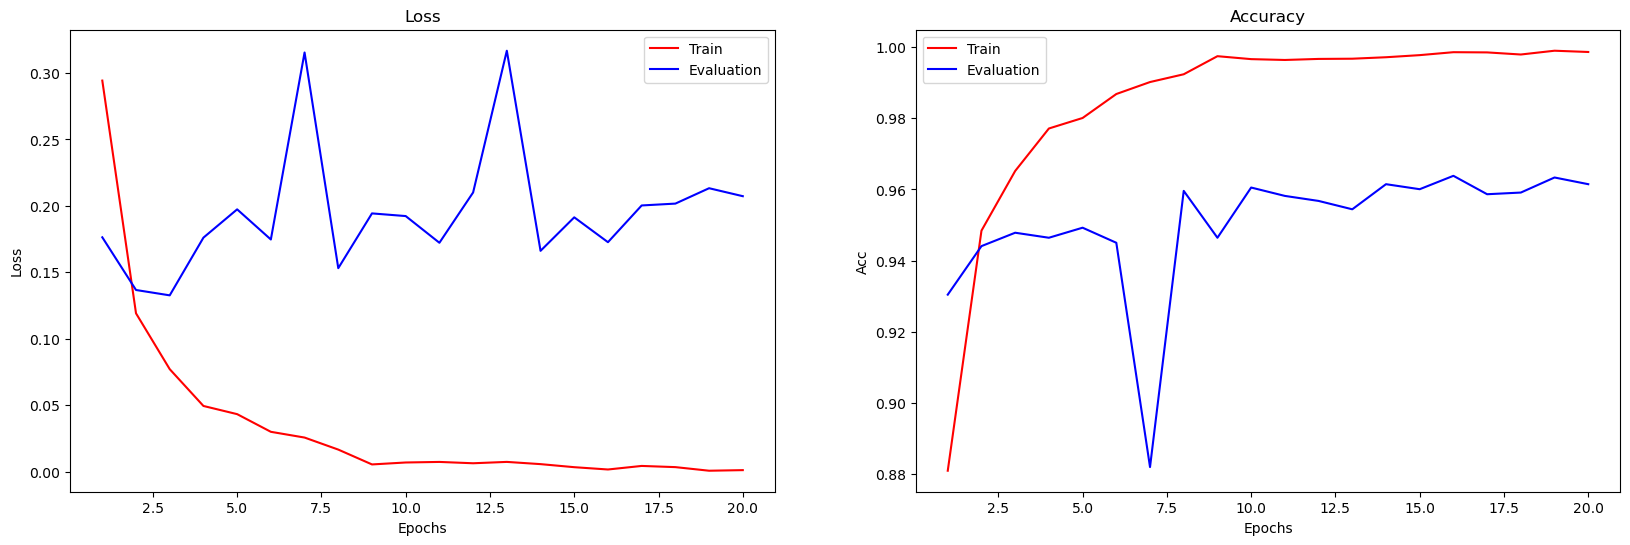

In [36]:
plot_metrics(history, path=results_path)

## Plot Images - True Predicted

In [37]:
inverted_labels_dict = {value: key for key, value in labels_dict.items()}
inverted_labels_dict

{0: 'Normal', 1: 'Lung_Opacity', 2: 'COVID', 3: 'Viral_Pneumonia'}

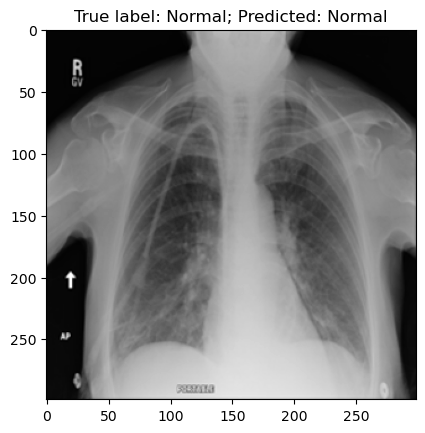

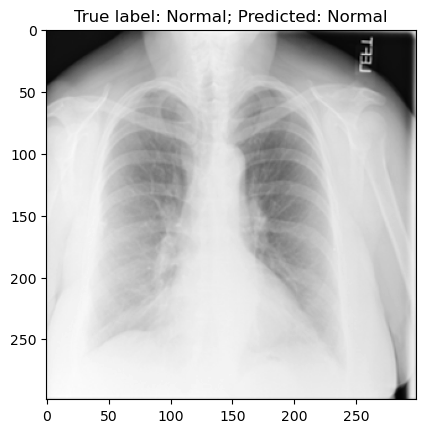

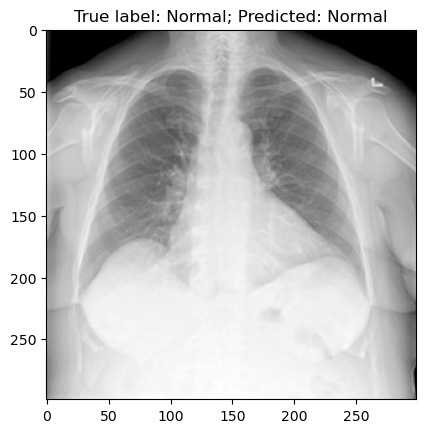

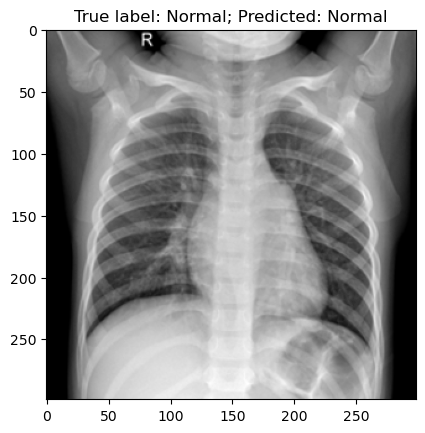

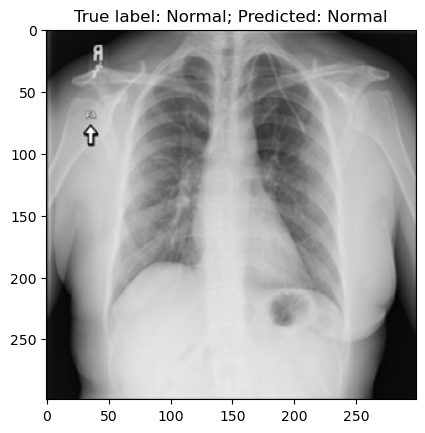

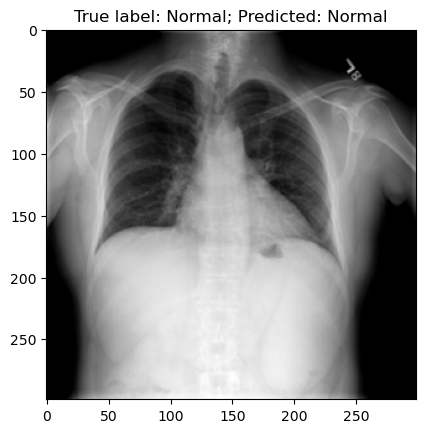

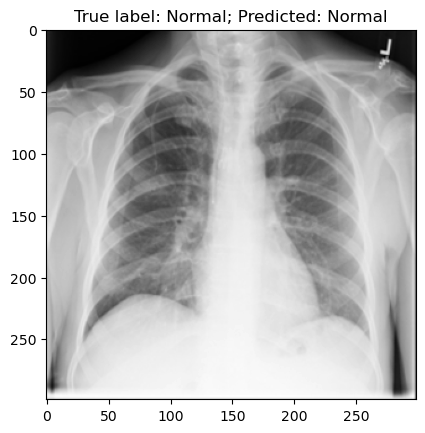

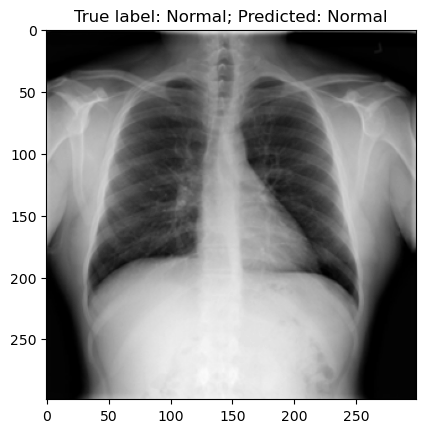

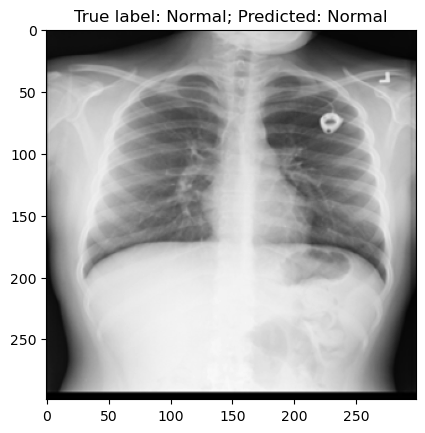

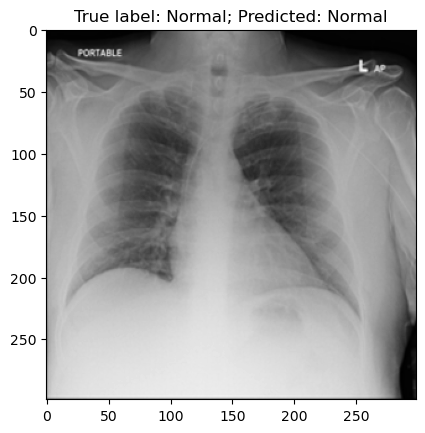

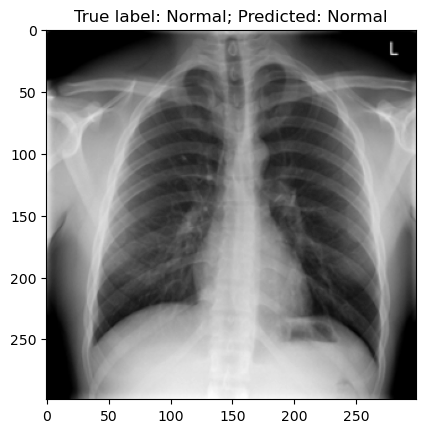

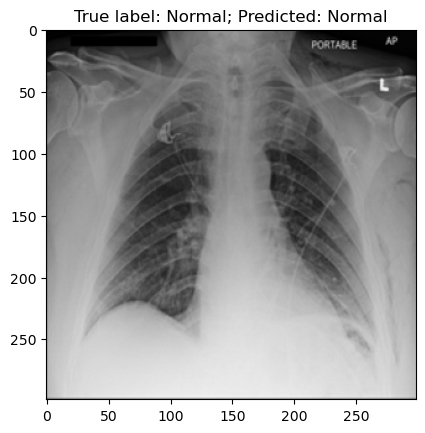

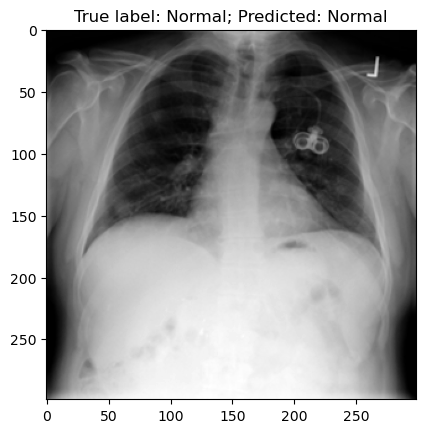

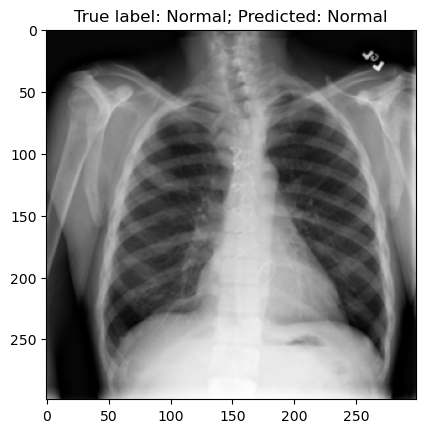

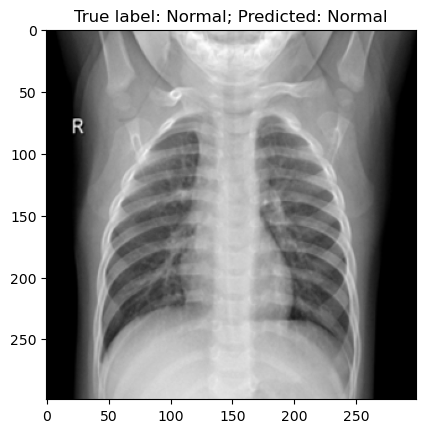

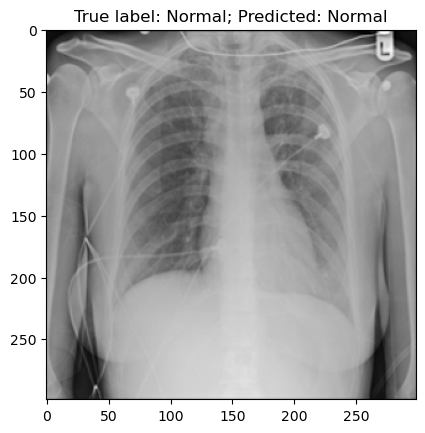

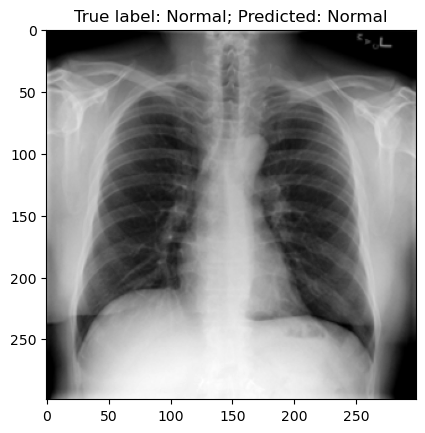

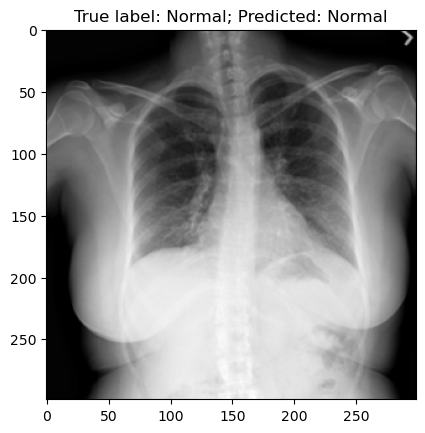

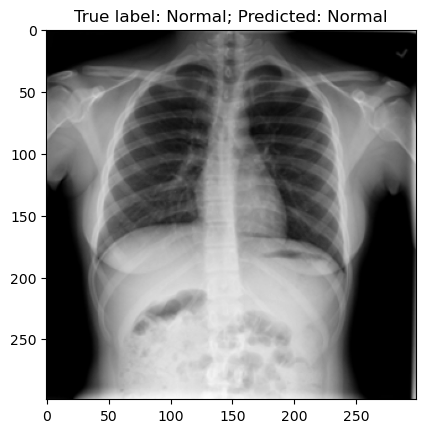

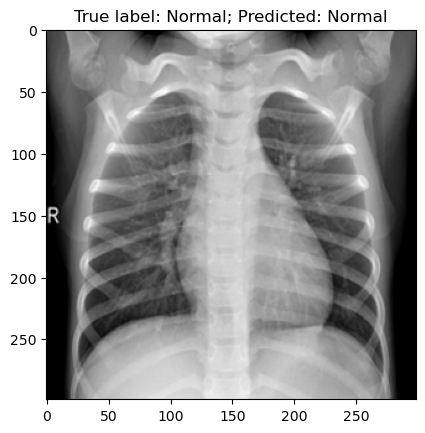

In [38]:
plot_image_pred_true(model, test_dataset, device, inverted_labels_dict, num_images_to_plot=20, plot_images=True)

# Save Model

In [39]:
torch.save(model.state_dict(), f'{results_path}.pth')